In [ ]:
from PIL import Image
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import cv2
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import matplotlib.pyplot as plt
import io
from google.colab import files

#IMPORT DATA

In [ ]:
def load_images(directory):
    images = []
    for filename in os.listdir(directory):

          img = Image.open(os.path.join(directory, filename))
          img = img.resize((224, 224)) #maksudnya panjang dan lebar gambar yaitu 224
          img = img.convert('RGB')
          img = np.array(img) / 255.0
          images.append(img)
    return images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Upload gambar dengan menggunakan google drive
tumor_images = load_images('/content/drive/MyDrive/yes')
no_tumor_images = load_images('/content/drive/MyDrive/no')

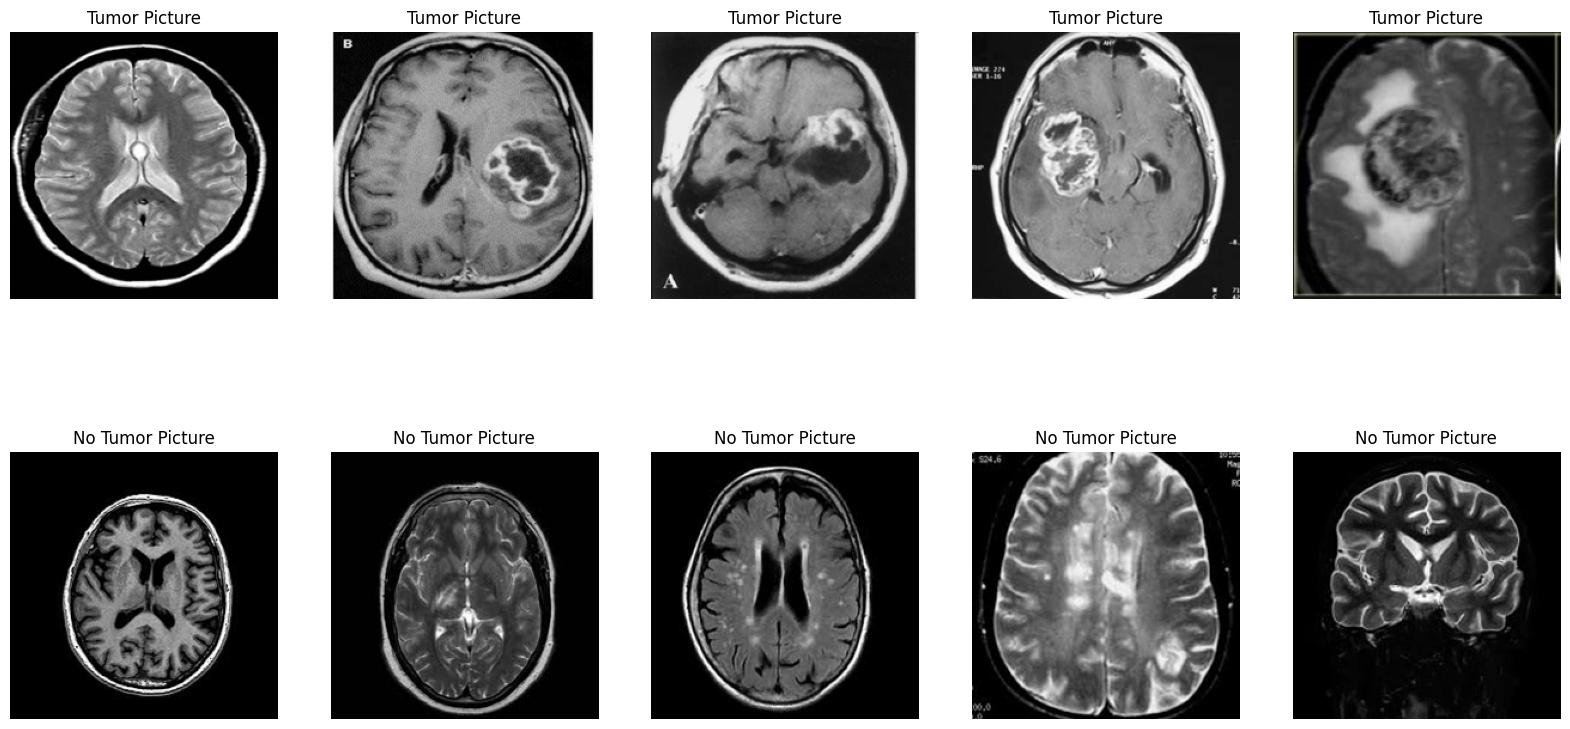

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for i in range(5):#melakukan perulangan lima kali untuk menampilkan gambar tumor
    axes[0, i].imshow(tumor_images[i])
    axes[0, i].set_title('Tumor Picture')
    axes[0, i].axis('off')

for i in range(5):#melakukan perulangan lima kali untuk menampilkan gambar tidak tumor
    axes[1, i].imshow(no_tumor_images[i])
    axes[1, i].set_title('No Tumor Picture')
    axes[1, i].axis('off')

plt.show()

In [ ]:
type(tumor_images) #untuk melihat tipe datanya

list

In [ ]:
len(tumor_images) #untuk melihat panjang atau banyak nya gambar pada gambar tumor

155

In [ ]:
len(no_tumor_images) #untuk melihat panjnag atau banyak nya gambar pada gambar bukan tumor

98

##Labeling

In [ ]:
def assign_labels(tumor_images, no_tumor_images):
    tumor_labels = np.ones(len(tumor_images)) #untuk data tumor saya beri angka 1
    no_tumor_labels = np.zeros(len(no_tumor_images)) #sedangkan untuk data bukan tumor diberi angka 0
    return tumor_labels, no_tumor_labels
tumor_labels, no_tumor_labels = assign_labels(tumor_images, no_tumor_images)

In [ ]:
tumor_labels #jika tumor labelnya 1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [ ]:
no_tumor_labels #jika bukan tumor labelnya 0

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
type(tumor_labels)

numpy.ndarray

In [ ]:
data = tumor_images + no_tumor_images
labels = np.concatenate((tumor_labels, no_tumor_labels), axis=0) #menggabungkan antara gambar tumor dengan data bukan tumor

In [ ]:
data

[array([[[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],
 
        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],
 
        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],
 
        ...,
 
        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392

In [ ]:
labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
data[0].shape #dimensinya itu tingginya 224 lebarnya 224 dan RGB nya adalah 3

(224, 224, 3)

##SPLITING DATA

In [ ]:
X = np.array(data) #variabel data akan menjadi feature atau x
y = np.array(labels) #sedangkan variabel label akan menjadi target atau y

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test = tf.data.Dataset.from_tensor_slices((X_test, y_test))


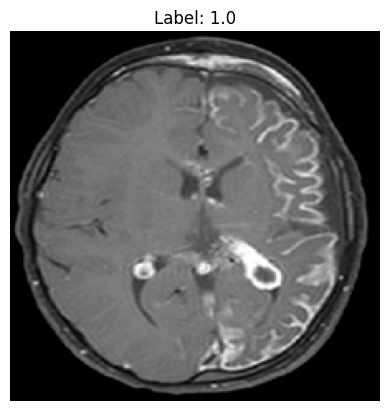

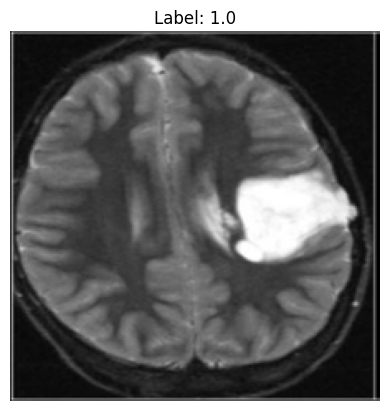

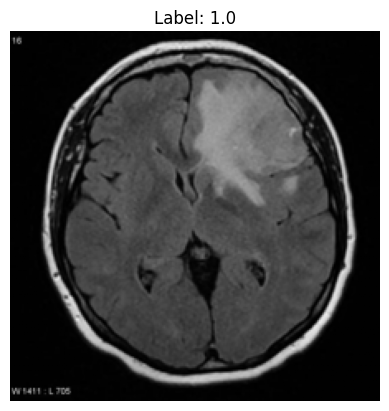

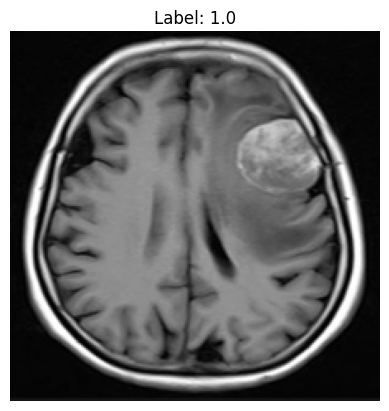

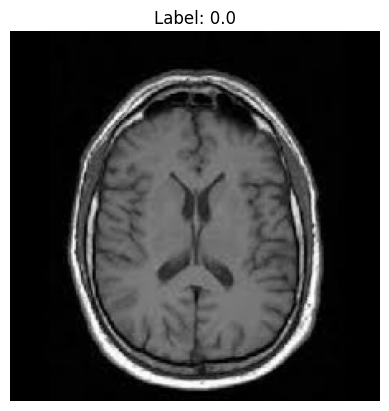

In [ ]:
for image, label in train.take(5):
    plt.figure()
    plt.imshow(image.numpy())
    plt.title('Label: {}'.format(label.numpy()))
    plt.axis('off')
    plt.show()

In [ ]:
validation_size = int(0.1 * 202)
train = train.skip(validation_size) #untuk data train 10% pertama akan di skip yang dipakai adalah data 11% hingga 100%
val = train.take(validation_size) #data yang tidak dipakai 10% pertama pada train tadi dipakai untuk data validation

In [ ]:
BATCH_SIZE = 32
train = train.batch(BATCH_SIZE)
test = test.batch(BATCH_SIZE)
val = val.batch(BATCH_SIZE)


##TRAINING DATA

In [ ]:
model = Sequential() #digunakan agar model berbaris yang ditumpuk secara horizontal

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (224,224,3), padding='valid'))
model.add(MaxPooling2D((2,2))) #untuk mengurangi dimensi gambar tanpa kehilangan informasi penting yang berguna untuk mempercepat perhitungan
model.add(Flatten()) #Mengubah hasil dari konvolusi & pooling (format matriks) menjadi 1D (vektor) agar bisa masuk ke lapisan Dense (fully connected).
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 394272)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │     100,933,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 100,935,041 (385.04 MB)

 Trainable params: 100,935,041 (385.04 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
evaluation = model.evaluate(test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 386ms/step - accuracy: 0.4569 - loss: 0.7080


In [ ]:
history = model.fit(train, validation_data = val, epochs = 20, verbose = 1)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 27s 4s/step - accuracy: 0.5367 - loss: 10.8118 - val_accuracy: 0.9000 - val_loss: 0.3476
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.7408 - loss: 2.9761 - val_accuracy: 0.8000 - val_loss: 0.8245
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.7175 - loss: 2.1384 - val_accuracy: 0.9000 - val_loss: 0.1542
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.8559 - loss: 0.7246 - val_accuracy: 0.9500 - val_loss: 0.0873
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.8721 - loss: 0.3051 - val_accuracy: 0.9500 - val_loss: 0.0858
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.9609 - loss: 0.1208 - val_accuracy: 1.0000 - val_loss: 0.0416
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.9741 - loss: 0.0830 - val_accuracy: 1.0000 - val_loss: 0.0169
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.9884 - loss: 0.0520 - val_accuracy: 1.0000 - val_loss: 0.0162
Epoch 9

In [ ]:
evaluation = model.evaluate(test) #tingkat akurasi nya adalah 87.19%


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 701ms/step - accuracy: 0.8719 - loss: 0.5916


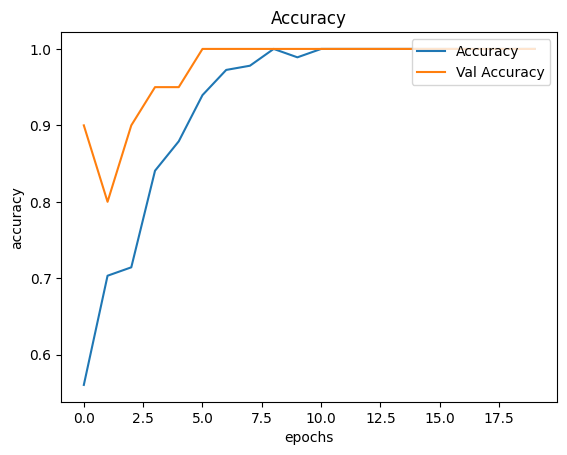

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Accuracy', 'Val Accuracy'], loc = 'upper right')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()


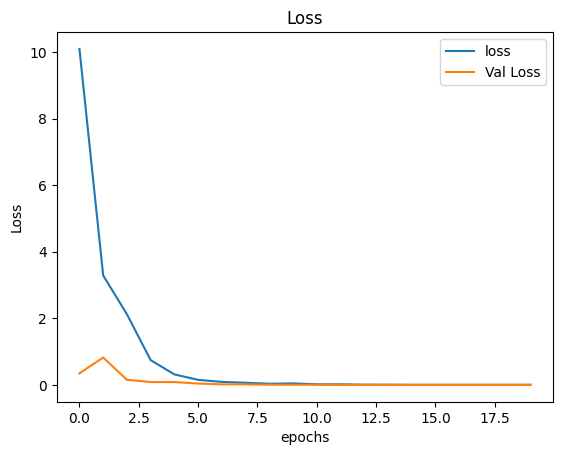

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'Val Loss'], loc = 'upper right')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
def load_uploaded_image(image_bytes):
    img = Image.open(io.BytesIO(image_bytes))
    img = img.resize((224, 224))
    img_array = np.array(img)
    img_array = img_array / 255.0
    return img_array

def predict_image(image_bytes):
    img_array = load_uploaded_image(image_bytes)
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    if prediction[0][0] > 0.5:
        return "Tumor detected"
    else:
        return "No tumor detected"

Saving Y104.jpg to Y104.jpg


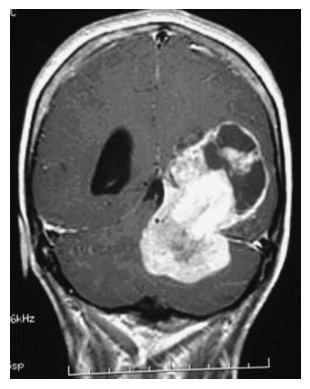

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
Tumor detected


In [ ]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
image_bytes = uploaded[file_name]
img = Image.open(io.BytesIO(image_bytes))

plt.imshow(img)
plt.axis('off')
plt.show()

result = predict_image(image_bytes)
print(result)